## Bibliotecas

In [1]:
import torch 
from torch import nn

torch.__version__

'2.1.2+cpu'

## Ejercicio 1: Cree un dataset de línea recta utilizando la fórmula de regresión lineal ().weight * X + bias

In [47]:
# --> Knows parameters
weight = 0.3
bias = 0.9

# --> Data
X = torch.arange(start=0, end=2, step=0.02).unsqueeze_(dim=1)
y = weight * X + bias

# --> Split data
number = int(len(X) * 0.8)
X_train, X_test = X[:number], X[number:]
y_train, y_test = y[:number], y[number:]

len(X_train), len(X_test)

(80, 20)

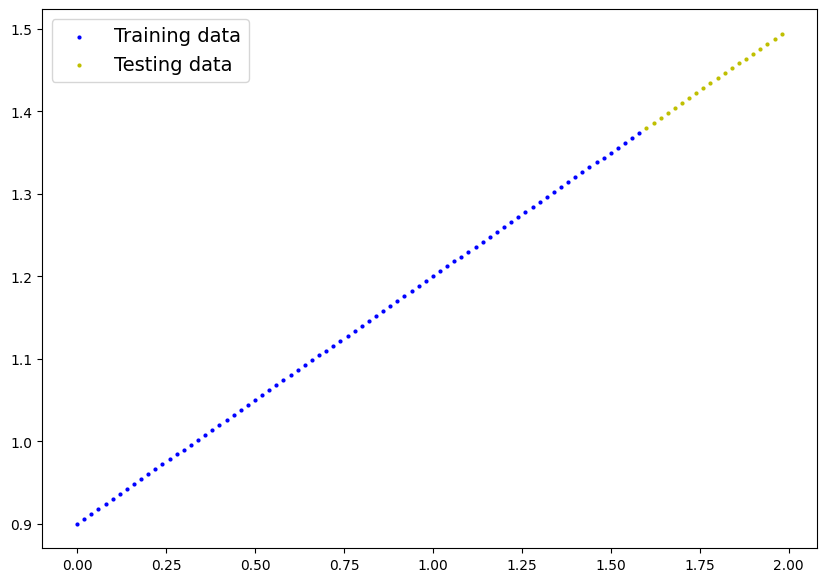

In [41]:
# --> Show data
import matplotlib.pyplot as plt

def plot_predictions(train_data, train_labels, test_data, test_labels, predictions=None):
    """
    Plots training data, test data and compares predictions.
    """
    plt.figure(figsize=(10, 7))

    # Plot training data in blue
    plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
    
    # Plot test data in yellow
    plt.scatter(test_data, test_labels, c="y", s=4, label="Testing data")

    if predictions is not None:
        # Plot the predictions in red (predictions were made on the test data)
        plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

    # Show the legend
    plt.legend(prop={"size": 14});

plot_predictions(X_train, y_train, X_test, y_test)

## Ejercicio 2: Compile un modelo de PyTorch mediante la creación de subclases .nn.Module

In [57]:
from torch import nn


# --> Model
class LinearRegression(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_layer = nn.Linear(in_features=1, out_features=1)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.linear_layer(x)
    
linear_model = LinearRegression()
linear_model.state_dict(), list(linear_model.parameters())

(OrderedDict([('linear_layer.weight', tensor([[-0.2343]])),
              ('linear_layer.bias', tensor([0.9186]))]),
 [Parameter containing:
  tensor([[-0.2343]], requires_grad=True),
  Parameter containing:
  tensor([0.9186], requires_grad=True)])

## Ejercicio 3: Cree una función de pérdida y un optimizador usando y respectivamente.nn.L1Loss()torch.optim.SGD(params, lr)

In [58]:
# --> Loss function
loss_fn = nn.L1Loss()

# --> Optimizer
optimizer = torch.optim.SGD(linear_model.parameters(), lr=0.01)

In [61]:
# --> Training loop
epochs = 300

train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(epochs):
    # --> Training
    linear_model.train()
    y_pred = linear_model(X_train)
    loss = loss_fn(y_pred, y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # --> Testing
    linear_model.eval()

    with torch.inference_mode():
        test_pred = linear_model(X_test)
        test_loss = loss_fn(test_pred, y_test.type(torch.float32))

        if epoch % 20 == 0:
            print(f"Epoch [{epoch} / {epochs}] -> Train loss: {loss.item():.4f} | Test loss: {test_loss.item():.4f}")


Epoch [0 / 300] -> Train loss: 0.0131 | Test loss: 0.0035
Epoch [20 / 300] -> Train loss: 0.0131 | Test loss: 0.0035
Epoch [40 / 300] -> Train loss: 0.0131 | Test loss: 0.0035
Epoch [60 / 300] -> Train loss: 0.0131 | Test loss: 0.0035
Epoch [80 / 300] -> Train loss: 0.0131 | Test loss: 0.0035
Epoch [100 / 300] -> Train loss: 0.0131 | Test loss: 0.0035
Epoch [120 / 300] -> Train loss: 0.0131 | Test loss: 0.0035
Epoch [140 / 300] -> Train loss: 0.0131 | Test loss: 0.0035
Epoch [160 / 300] -> Train loss: 0.0131 | Test loss: 0.0035
Epoch [180 / 300] -> Train loss: 0.0131 | Test loss: 0.0035
Epoch [200 / 300] -> Train loss: 0.0131 | Test loss: 0.0035
Epoch [220 / 300] -> Train loss: 0.0131 | Test loss: 0.0035
Epoch [240 / 300] -> Train loss: 0.0131 | Test loss: 0.0035
Epoch [260 / 300] -> Train loss: 0.0131 | Test loss: 0.0035
Epoch [280 / 300] -> Train loss: 0.0131 | Test loss: 0.0035


## Ejercicio 4: Realice predicciones con el modelo entrenado en los datos de prueba.

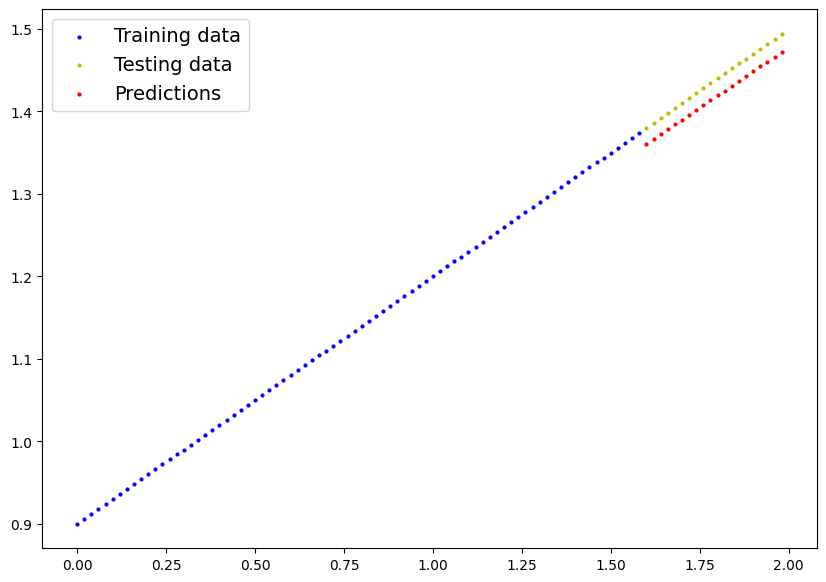

In [62]:
linear_model.eval()

with torch.inference_mode():
    predictions = linear_model(X_test)

plot_predictions(X_train, y_train, X_test, y_test, predictions)

## Ejercicio 5: Guarde los modelos entrenados en el archivo.state_dict()

In [63]:
from pathlib import Path

# 1. Create models directory 
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path 
MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict 
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(
    obj=linear_model.state_dict(), # only saving the state_dict() only saves the models learned parameters
    f=MODEL_SAVE_PATH
)

Saving model to: models\01_pytorch_workflow_model_0.pth


## Ejercicio 6: Cargar modelo

In [65]:
# Instantiate a new instance of our model (this will be instantiated with random weights)
loaded_model_0 = LinearRegression()

# Load the state_dict of our saved model (this will update the new instance of our model with trained weights)
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

# 1. Put the loaded model into evaluation mode
loaded_model_0.eval()

# 2. Use the inference mode context manager to make predictions
with torch.inference_mode():
    loaded_model_preds = loaded_model_0(X_test) # perform a forward pass on the test data with the loaded model

predictions == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])